# Telco customer churn data analysis 

This Jupyter notebook explores Telco churn data available on [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#reading the csv file with data
df = pd.read_csv(r"C:\Users\Paulina\Desktop\Projects_Git\Telcom_churn\data\Telco_churn.csv")

## Data exploration

This part explores the columns and the values included in it.

In [5]:
df.info() #shows column entry types and the number of filled rows in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can see that there are numerous columns with Yes/No values - I will be chnaging it into numerical values 0 and 1 during data cleaning. Any machine learning models will not be able to use categorical values so it's better to change them. Additionally, TotalCharges is registered as an object but they look like floating numbers. This will be changed as well to allow calculations. 

I can anticipate that there will be probably no missing values after seeing the Non-Null count in `.head()`, but let's check it to be sure.

In [9]:
#checking for missing values
print('Total number of missing values:')
print(df.isna().sum())

Total number of missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Let's explore unique values for our cathegorical columns, because they may contain more than just `'Yes'` and `'No'` entries. 

In [11]:
cat_cols = df.select_dtypes(include = 'object').columns

for col in cat_cols:
    uniques = df[col].unique()
    print(f'Column:{col}')
    print(f'Unique values ({len(uniques)}):{uniques}')
    print('-'*40)

Column:customerID
Unique values (7043):['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column:gender
Unique values (2):['Female' 'Male']
----------------------------------------
Column:Partner
Unique values (2):['Yes' 'No']
----------------------------------------
Column:Dependents
Unique values (2):['No' 'Yes']
----------------------------------------
Column:PhoneService
Unique values (2):['No' 'Yes']
----------------------------------------
Column:MultipleLines
Unique values (3):['No phone service' 'No' 'Yes']
----------------------------------------
Column:InternetService
Unique values (3):['DSL' 'Fiber optic' 'No']
----------------------------------------
Column:OnlineSecurity
Unique values (3):['No' 'Yes' 'No internet service']
----------------------------------------
Column:OnlineBackup
Unique values (3):['Yes' 'No' 'No internet service']
----------------------------------------
Column:DeviceProtection


## Data cleaning

Includes changing datatypes and encoding categorical variables for modelling. Let's change all 'Yes' into 1 and 'No' into 0. 

In [13]:
# changing the string entires into numeric values with errors showing as NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
# creating a copy of dataframe to have a backup before implementing big changes
# especially useful for data visualizations in Tableau because we retain string values instead of numerical ones
df_copy = df.copy()

In [15]:
change_yes_no = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
change_yes_no_nis = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


# changing the yes into 1 and No into 0 in columns that only have those 2 unique entries:
for col in change_yes_no:
    df[col] = df[col].replace('Yes', 1)
    df[col] = df[col].replace('No', 0)

# changing Yes into 1, No into 0 and No internet service into 2 
for col in change_yes_no_nis:
    df[col] = df[col].replace('Yes', 1)
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('No internet service', 2)

# changing female into 0 and male into 1
df['gender'] = df['gender'].replace('Female', 0)
df['gender'] = df['gender'].replace('Male', 1)

# changing the MultipleLines in similiar way
df['MultipleLines'] = df['MultipleLines'].replace('No', 0)
df['MultipleLines'] = df['MultipleLines'].replace('Yes', 1)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 2)


In [16]:
cat_cols = df.select_dtypes(include = 'object').columns

for col in cat_cols:
    uniques = df[col].unique()
    print(f'Column:{col}')
    print(f'Unique values ({len(uniques)}):{uniques}')
    print('-'*40)

Column:customerID
Unique values (7043):['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column:InternetService
Unique values (3):['DSL' 'Fiber optic' 'No']
----------------------------------------
Column:Contract
Unique values (3):['Month-to-month' 'One year' 'Two year']
----------------------------------------
Column:PaymentMethod
Unique values (4):['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
----------------------------------------


I'll leave the rest of the columns as they are right now to preserve the information. 

## Exploratory Data Analysis

This section contains the basic data analysis to explore the distributions of our values.

In [19]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7032.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,...,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,NaN,0.720006,...,0.777226,0.723555,0.817691,0.821241,NaN,0.592219,NaN,64.761692,2283.300441,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,NaN,0.796885,...,0.778826,0.795896,0.763212,0.761725,NaN,0.491457,NaN,30.090047,2266.771362,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.500000,401.450000,0.000000
50%,NaN,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,70.350000,1397.475000,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.850000,3794.737500,1.000000


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

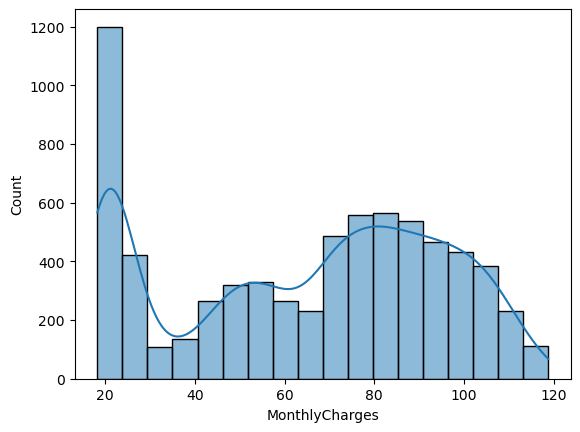

In [20]:
sns.histplot(df['MonthlyCharges'], kde = True)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

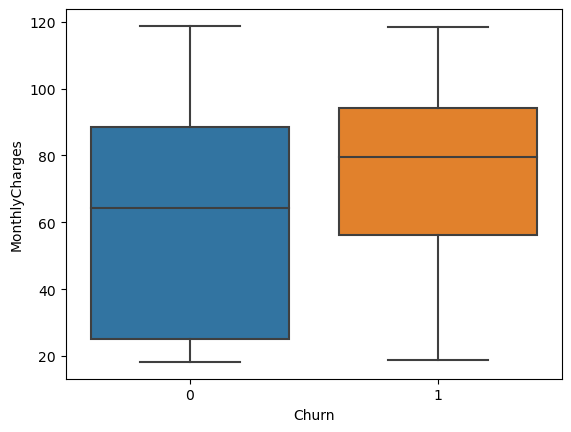

In [21]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)

<Axes: xlabel='TotalCharges', ylabel='Count'>

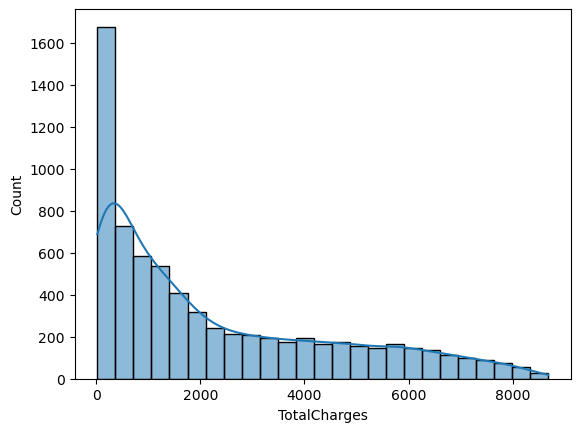

In [22]:
sns.histplot(df['TotalCharges'], kde = True)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

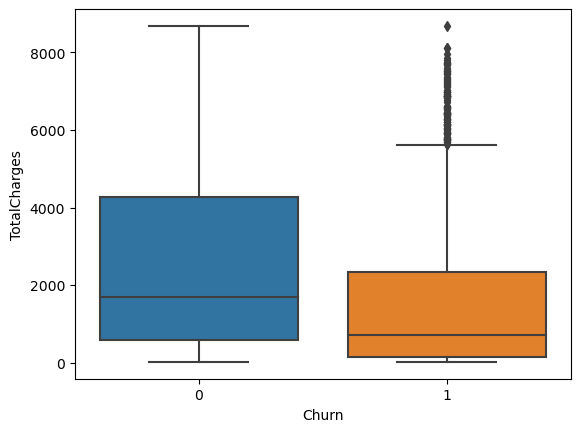

In [23]:
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df)

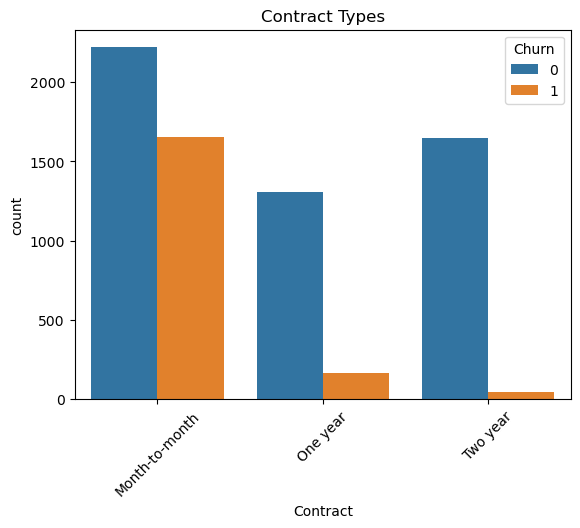

In [24]:
sns.countplot(x='Contract', hue = 'Churn', data = df)
plt.title('Contract Types')
plt.xticks(rotation = 45)
plt.show()

In [25]:
# count of each contract type churned  - 1 means the customer in this contract type churned last month
pd.crosstab(df['Contract'], df['Churn'])

Churn,0,1
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [26]:
# % of customers with each contract type churned
pd.crosstab(df['Contract'], df['Churn'], normalize = 'index')

Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [31]:
# Get correlation matrix of numeric columns
corr = df.corr(numeric_only=True)

# Slice just the 'Churn' correlations, sort by strength
churn_corr = corr['Churn'].sort_values(ascending=False)

print(churn_corr)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.199484
StreamingTV        -0.205742
StreamingMovies    -0.207256
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Name: Churn, dtype: float64


C:\Users\Paulina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


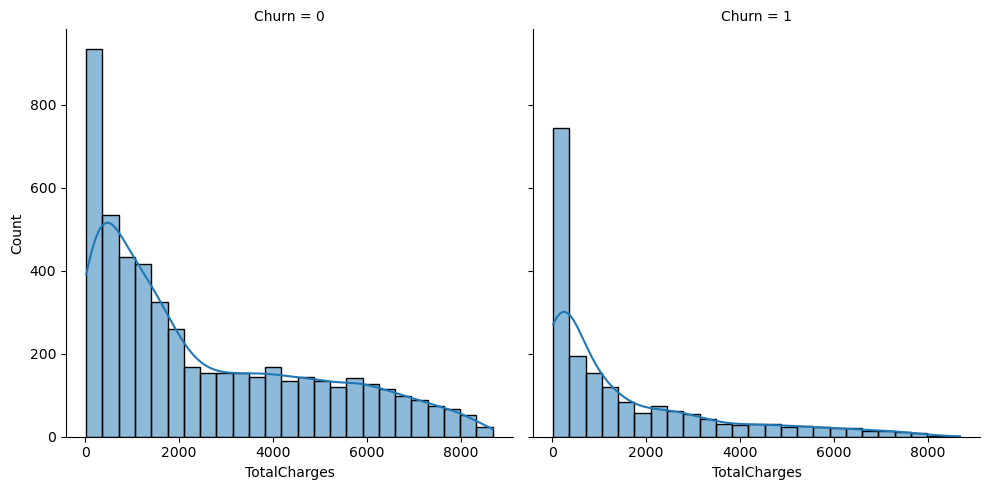

In [29]:
sns.displot(data=df, x=df['TotalCharges'], col=df['Churn'], kde=True)

Summarizing cell of EDA:
- churn is highest among customers with month-to-month contracts - 42.7% of clients with month-to-month contract churned
- clients with higher monthly charges are more probable to churn
- clinets who have a higher total of charges are more probable to stay - loyal customers will stay longer, a lot of outliers on the higher end supports it
- 